<h1><center>Programming Exercise 2:<br>Logistic Regression</center></h1>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,6)

# 1. Logistic Regression
- Assignment: As the administrator of a university department determine each applicant's chance of admission based on the results of two exams

## 1.1 Visualizing the Data

In [49]:
scores1,scores2,class_label = np.loadtxt('ex2data1.txt',delimiter=',',unpack=True)

# Let's build the design matrix
design = np.c_[np.ones_like(scores1),scores1,scores2]
# and theta initialized to zero's right away
theta = np.zeros(np.shape(design)[1])

admit_cut = (class_label==1) # admitted students cut
reject_cut = (class_label==0) # rejected students cut 

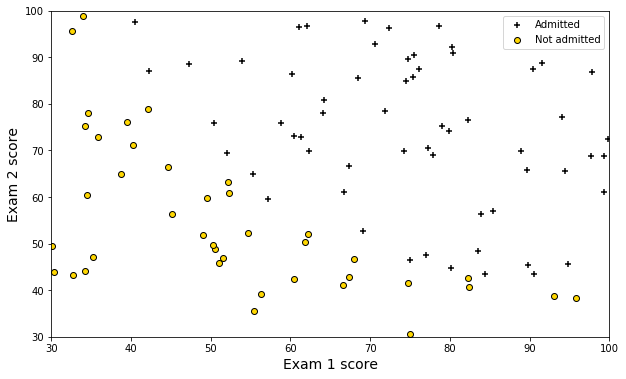

In [3]:
# Plot
plt.figure()
plt.scatter(design[:,1][admit_cut],design[:,2][admit_cut],c='k',marker='+',label='Admitted')
plt.scatter(design[:,1][reject_cut],design[:,2][reject_cut],marker='o',edgecolor='k',facecolor='gold',label='Not admitted')
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel('Exam 1 score',fontsize=14)
plt.ylabel('Exam 2 score', fontsize=14)
plt.legend(loc='upper right',fontsize='medium')
plt.show()

## 1.2 Implementation

In [4]:
def sigmoid(z):
    '''
    Computes the sigmoid function - the hypothesis for Logistic Regression - given input z
    In the case of Logistic Regression z = X*Theta (which is an m by 1 vector)
    so that H = 1/(1+exp(-X*Theta))
    
    Parameters
    ----------
    z: array
    
    Returns
    -------
    value of sigmoid at the given vector z
    '''
    return 1/(1+np.exp(-z))

In [5]:
sigmoid(0) # != 1/2

0.5

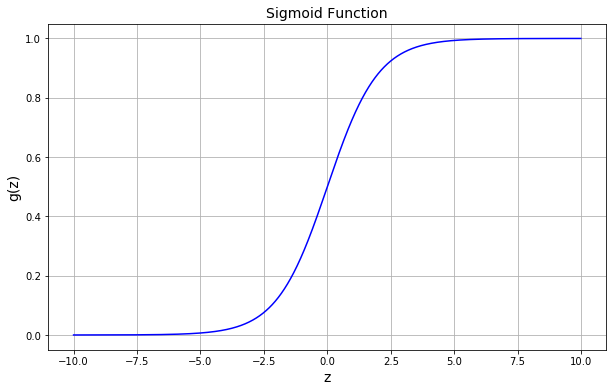

In [6]:
# Let's plot the sigmoid and confirm its shape
plt.figure()
plt.grid(True)
zz = np.arange(-10,10,0.01)
plt.plot(zz,sigmoid(zz),'-b')
plt.xlabel('z',fontsize=14)
plt.ylabel('g(z)',fontsize=14)
plt.title('Sigmoid Function',fontsize=14)
plt.show()

In [7]:
np.shape(design)

(100, 3)

- Note that the `@` operator is used for matrix multiplication, a feature introduced in Python 3.5 and the `*` operator is used for element-wise multiplication; see https://stackoverflow.com/questions/27385633/what-is-the-symbol-for-in-python

In [50]:
# Let's define the cost function for Logistic Regression
# I will add the regularization bit now and make it an optional parameter of the function
def costFunction(design,theta,output,reg_param=0):
    '''
    Computes the cost function J = -1/m{Y^T*Log(g(X*Theta))+(1-Y)^T*Log(1-g(X*Theta))}+lambda/2m{Theta^T*Theta}
    which is a function of Theta for a given sample set; the regularization term is included only if a regularization parameter is passed in 
    X is the design matrix of shape m by (n+1), Theta is the fit (n+1) parameter vector, Y is the m output vector of class labels
    and lambda is the regulatization parameter
    Returns the scalar J
    
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    output: m-dimensional output vector
    reg_flag (optional): scalar, regularization parameter; default is 0
    
    Returns
    -------
    costJ: scalar, value of the cost function
    '''
    
    m = np.shape(design)[0] # sample size
    hypothesis = sigmoid(design @ theta)
    costJ = -1/m*(output.T @ np.log(hypothesis)+((1-output).T @ np.log(1-hypothesis))+reg_param/(2*m)*(theta.T @ theta))
                  
    return costJ

In [51]:
# Test with initial theta of zeros
costFunction(design,theta,class_label)

0.69314718055994518

In [59]:
# Let's define gradient descent for Logistic Regression
def gradientDescent(design,theta,output,history_j=None,alpha=0.1,iterations=0,reg_param=0):
    '''
    Performs update of (n+1) fit parameters with batch gradient descent method, i.e
        Theta_J := Theta_j - alpha*dJ/dTheta_j for j=0,2,..,n
                 = {1-alpha*lambda/m}Theta-alpha/m{X^T*{g(X*Theta)-Y}}
    The regularization factor will only be added if a regularization parameter is passed in
    
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    output: m-dimensional output vector
    history_j (optional): dictionary with key "theta_history" where we keep all values of theta vector as we iterate
    alpha: scalar learning rate
    iterations: number of iterations
    reg_param: scalar, regularization parameter; default is 0
    '''
    print('Initial values:')
    for idx_theta,ii_theta in enumerate(theta):
        print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))
    print('\tCost Function J: {}'.format(costFunction(design,theta,output)))
    m = np.shape(design)[0] # sample size
    hypothesis = sigmoid(design @ theta)

    if True:
        # Step through parameter space
        for ii_iter in range(iterations):
            theta[:] = (1-alpha*reg_param/m)*theta - alpha/m*(design.T @ (hypothesis-output)) # [:] will assign values to the elements of the theta array and thus will change the original array
                                                                                              # if we do theta = tem_theta instead, the value it pointed to before the assignment in this function will remain unchanged        
            if history_j is not None: # if we've provided a dictionary, save the respective value
                history_j["theta_history"][ii_iter] = theta
                history_j["J_history"][ii_iter] = costFunction(design,theta,output)

        print('\nAfter {} iterations, final values:'.format(iterations))
        for idx_theta,ii_theta in enumerate(theta):
            print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))

        print('\tCost Function J: {}'.format(costFunction(design,theta,output)))

In [58]:
# The assigment asks to use a minimization function but first let's try out doing GD with our function

# As we iterate through different values of theta we want to keep a record of J
history_j = dict.fromkeys(['theta_history','J_history'])

# How many iterations of GD? Learning rate?
iterations = 100
alpha = 0.01

# Theta initialized to zero
theta = np.zeros(np.shape(design)[1])

# Allocate space
history_j['J_history'] = np.empty(iterations)
history_j['theta_history'] = np.empty((iterations,np.shape(theta)[0]))

In [60]:
# Apply our GD
gradientDescent(design,theta,class_label,history_j,alpha,iterations)

Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Theta_2: 0.0
	Cost Function J: 0.6931471805599452

After 100 iterations, final values:
	Theta_0: 0.10000000000000007
	Theta_1: 12.009216589291151
	Theta_2: 11.262842205513605
	Cost Function J: nan


/home/les67/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log


- The issue comes from the computing the cost function with the optimized parameters for theta
- This is because `z = X*Theta` gives very large numbers which when computing `np.exp(-X @ Theta)` throws out the error:
    - `/home/les67/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':`
- So we need a higher float precision which we can achieve through the `bigfloat package`. See discussion here: https://stackoverflow.com/questions/9559346/deal-with-overflow-in-exp-using-numpy

In [73]:
import bigfloat

ImportError: No module named 'bigfloat'

In [70]:
design[0,:]

array([  1.        ,  34.62365962,  78.02469282])

In [68]:
sigmoid(design @ theta)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [72]:
np.exp(1294)

/home/les67/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


inf

In [64]:
costFunction(design,theta,class_label)

/home/les67/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log


nan

# 2. Regularized Logistic Regression